In [1]:
# Run some setup code for this notebook.

import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# Load the raw CIFAR-10 data.
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)




Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [2]:
num_training = X_train.shape[0]
num_test =X_test.shape[0]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(50000, 3072) (10000, 3072)


In [3]:
from cs231n.classifiers import KNearestNeighbor

# Create a kNN classifier instance. 
# Remember that training a kNN classifier is a noop: 
# the Classifier simply remembers the data and does no further processing 
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

In [ ]:
# Let's compare how fast the implementations are
def time_function(f, *args):
    """
    Call a function f with args and return the time (in seconds) that it took to execute.
    """
    import time
    tic = time.time()
    f(*args)
    toc = time.time()
    return toc - tic

two_loop_time = time_function(classifier.compute_distances_two_loops, X_test)
print('Two loop version took %f seconds' % two_loop_time)
print('totally cost: %d h %d min %f s ' % ((two_loop_time)/3600, (two_loop_time)/60%60, (two_loop_time) % 60))




Two loop version took 44597.219188 seconds
totally cost: 12 h 743 min 17.219188 s 


In [4]:
# Let's compare how fast the implementations are
def time_function(f, *args):
    """
    Call a function f with args and return the time (in seconds) that it took to execute.
    """
    import time
    tic = time.time()
    f(*args)
    toc = time.time()
    return toc - tic


one_loop_time = time_function(classifier.compute_distances_one_loop, X_test)
print('One loop version took %f seconds' % one_loop_time)
print('totally cost: %d h %d min %f s ' % ((one_loop_time)/3600, (one_loop_time)/60%60, (one_loop_time) % 60))

y_test_pred = classifier.predict_labels(dists, k=1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

One loop version took 17310.382195 seconds


NameError: name 'two_loop_time' is not defined

In [7]:
print('totally cost: %d h %d min %f s ' % ((one_loop_time)/3600, (one_loop_time)/60%60, (one_loop_time) % 60))


totally cost: 4 h 48 min 30.382195 s 


In [9]:
import time
tic = time.time()

dists = classifier.compute_distances_no_loops(X_test)
print(dists.shape)
toc = time.time()
no_loop_time = toc-tic
print('No loop version took %f seconds' % no_loop_time)
print('totally cost: %d h %d min %f s ' % ((no_loop_time)/3600, (no_loop_time)/60%60, (no_loop_time) % 60))


(10000, 50000)
No loop version took 27.304897 seconds
totally cost: 0 h 0 min 27.304897 s 


In [10]:
y_test_pred = classifier.predict_labels(dists, k=1)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 3539 / 10000 correct => accuracy: 0.353900


In [11]:
y_test_pred = classifier.predict_labels(dists, k=5)

# Compute and print the fraction of correctly predicted examples
num_correct = np.sum(y_test_pred == y_test)
accuracy = float(num_correct) / num_test
print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))

Got 3398 / 10000 correct => accuracy: 0.339800


In [12]:
k_choices = [1, 3, 5, 8, 10, 12, 15, 20, 50, 100]
accuracy_list =[]

for k in k_choices:
    y_test_pred = classifier.predict_labels(dists, k=k)
    num_correct = np.sum(y_test_pred == y_test)
    accuracy = float(num_correct) / num_test
    accuracy_list.append(accuracy)
    # print('Got %d / %d correct => accuracy: %f' % (num_correct, num_test, accuracy))


In [13]:
print(accuracy_list)

[0.3539, 0.3303, 0.3398, 0.3415, 0.3386, 0.3429, 0.3405, 0.3375, 0.3239, 0.3118]


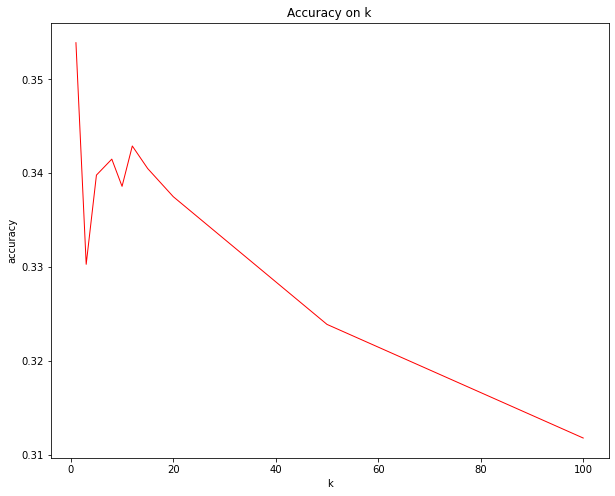

In [14]:
# plot the raw observations
# for i in range (len(k_choices)):

#     plt.scatter(k_choices[i], accuracy_list[i])

# plot the trend line with error bars that correspond to standard deviation
# accuracies_mean = np.array([np.mean(v) for k,v in sorted(k_to_accuracies.items())])
# accuracies_std = np.array([np.std(v) for k,v in sorted(k_to_accuracies.items())])
# plt.errorbar(k_choices, accuracies_mean, yerr=accuracies_std)
plt.plot(k_choices,accuracy_list,color="red",linewidth=1 )
plt.title('Accuracy on k')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()